In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('eval.csv')

In [5]:
df.head(100)

,type of prompt,model,correct answer,incorrect answer
0,zero_shot_prompt,deepseek-llm-7b-chat,59,72
1,zero_shot_prompt,deepseek-llm-7b-chat,58,73
2,zero_shot_prompt,deepseek-llm-7b-chat,40,91
3,zero_shot_prompt,deepseek-llm-7b-chat,59,72
4,zero_shot_prompt,deepseek-llm-7b-chat,52,79
5,zero_shot_prompt,Llama-3.2-3B-Instruct,2,129
6,zero_shot_prompt,Llama-3.2-3B-Instruct,0,131
7,zero_shot_prompt,Llama-3.2-3B-Instruct,6,125
8,zero_shot_prompt,Llama-3.2-3B-Instruct,5,126
9,zero_shot_prompt,Llama-3.2-3B-Instruct,5,126


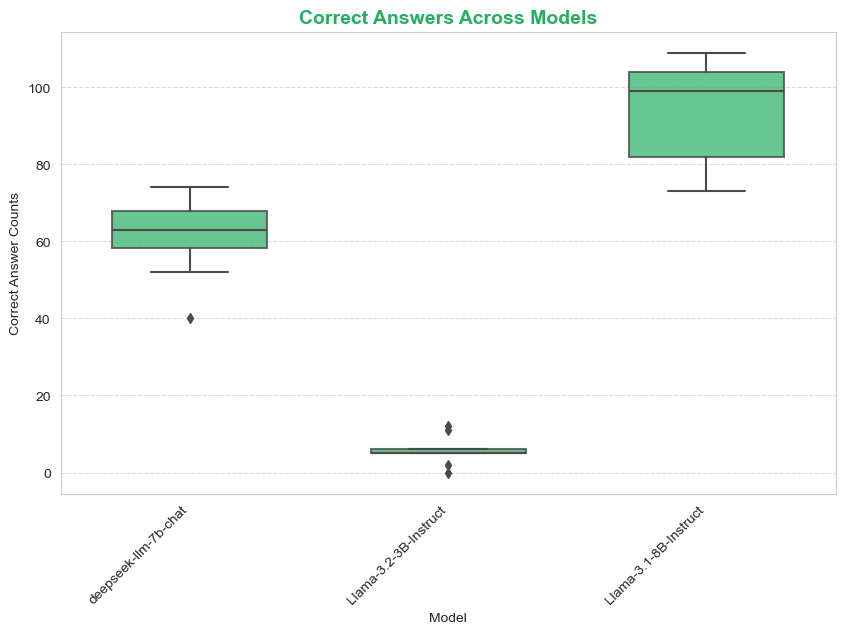

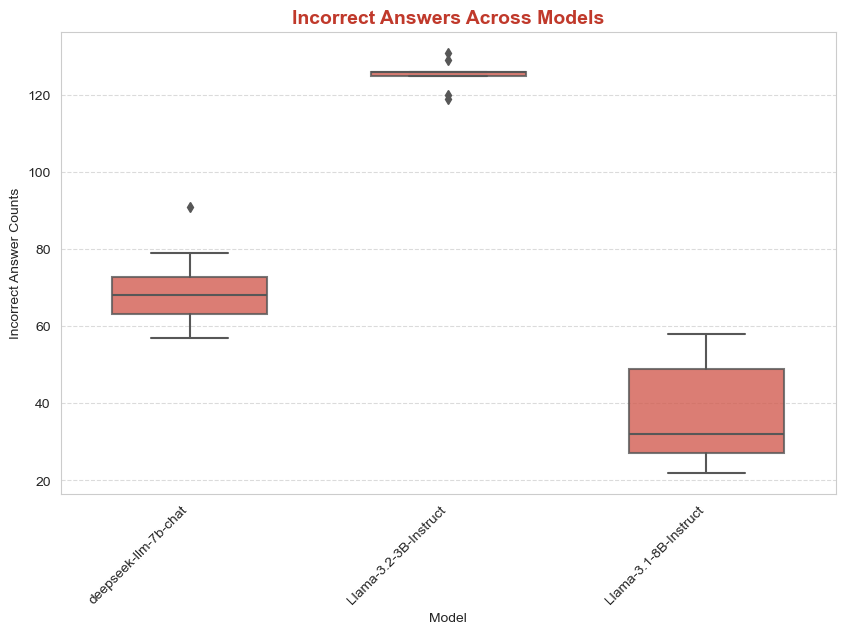

In [9]:
# Ensure the column names match the ones in the dataset
# If column names are different, update them accordingly
correct_col = "correct answer"  
incorrect_col = "incorrect answer"  
model_col = "model"
prompt_col = "type of prompt"   

# Creating the first boxplot for correct answers
plt.figure(figsize=(10, 6))
sns.boxplot(x=model_col, y=correct_col, data=df, color="#2ECC71", width=0.6, boxprops=dict(alpha=0.8))
plt.xticks(rotation=45, ha="right")
plt.title("Correct Answers Across Models", fontsize=14, fontweight='bold', color="#27AE60")
plt.ylabel("Correct Answer Counts")
plt.xlabel("Model")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Creating the second boxplot for incorrect answers in a cool red shade
plt.figure(figsize=(10, 6))
sns.boxplot(x=model_col, y=incorrect_col, data=df, color="#E74C3C", width=0.6, boxprops=dict(alpha=0.8))
plt.xticks(rotation=45, ha="right")
plt.title("Incorrect Answers Across Models", fontsize=14, fontweight='bold', color="#C0392B")
plt.ylabel("Incorrect Answer Counts")
plt.xlabel("Model")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


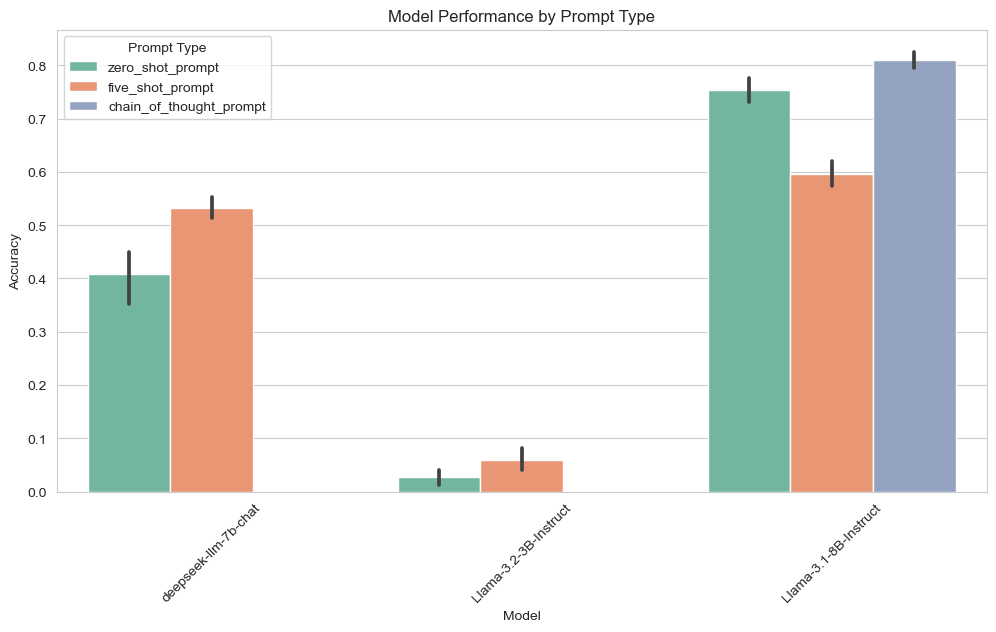

In [12]:
# Calculate accuracy
df["accuracy"] = df["correct answer"] / (df["correct answer"] + df["incorrect answer"])
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="model", y="accuracy", hue="type of prompt", palette="Set2")
plt.title("Model Performance by Prompt Type")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.legend(title="Prompt Type")
plt.show()